In [9]:
import os
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil

In [10]:
base_dir = 'humans_small'

In [11]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [12]:
class_names = ['Mirha', 'Saad', 'Eman']

In [13]:
for class_name in class_names:
    os.mkdir(os.path.join(train_dir, class_name))
    os.mkdir(os.path.join(validation_dir, class_name))
    os.mkdir(os.path.join(test_dir, class_name))

In [14]:
original_dataset_dir_mirha = 'Dataset\\Mirha'

In [15]:
for class_name in class_names:
    fnames = ['{}.{}.jpg'.format(class_name, i+1) for i in range(40)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_mirha, fname)
        dst = os.path.join(train_dir, class_name, fname)
        shutil.copyfile(src, dst)

In [16]:
for class_name in class_names:
    fnames = ['{}.{}.jpg'.format(class_name, i) for i in range(40, 45)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_mirha, fname)
        dst = os.path.join(validation_dir, class_name, fname)
        shutil.copyfile(src, dst)

    fnames = ['{}.{}.jpg'.format(class_name, i) for i in range(45, 50)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir_mirha, fname)
        dst = os.path.join(test_dir, class_name, fname)
        shutil.copyfile(src, dst)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [19]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    classes=class_names
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    classes=class_names
)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [31]:
# Calculate total number of samples
total_train_samples = 40
total_validation_samples = 5

# Assuming batch_size = 20
batch_size = 20

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size



In [22]:
# Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    validation_data=validation_generator,
    validation_steps= 1)

C:\Users\Window\AppData\Local\Temp\ipykernel_2216\1196154018.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 1.1175 - acc: 0.3300 - val_loss: 1.0900 - val_acc: 0.2667
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 1.0874 - acc: 0.4100 - val_loss: 1.0754 - val_acc: 0.4667
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 1.0726 - acc: 0.4000 - val_loss: 1.0584 - val_acc: 0.4667
Epoch 4/100
5/5 [==============================] - 6s 1s/step - loss: 1.0883 - acc: 0.3500 - val_loss: 1.0551 - val_acc: 0.4667
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 1.0700 - acc: 0.4800 - val_loss: 1.0921 - val_acc: 0.3333
Epoch 6/100
5/5 [==============================] - 6s 1s/step - loss: 1.0726 - acc: 0.3600 - val_loss: 1.0498 - val_acc: 0.4667
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 1.0525 - acc: 0.4800 - val_loss: 1.0468 - val_acc: 0.4000
Epoch 8/100
5/5 [==============================] - 6s 1s/step - loss: 1.0931 - acc: 0.3700 - val_loss: 1

In [24]:
# Save the model
model.save('humans_small_model.h5')

c:\Users\Window\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


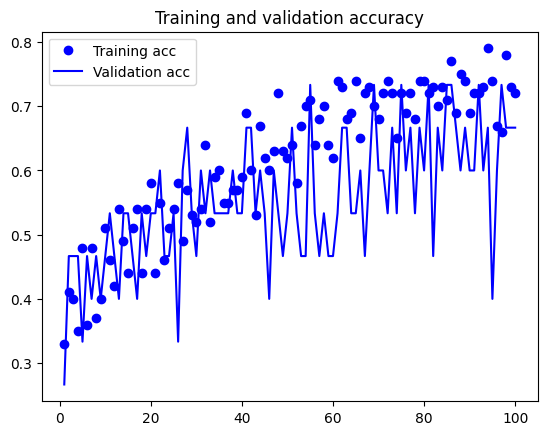

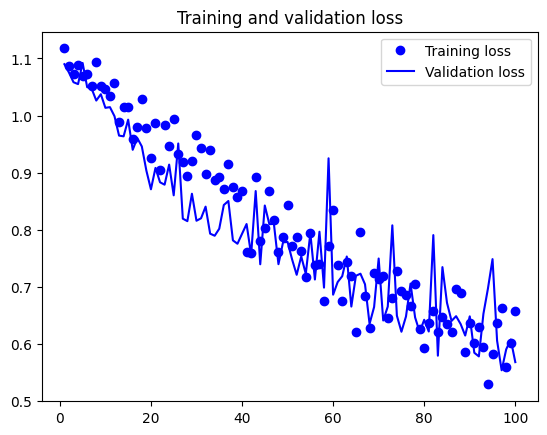

In [23]:
# Plot training and validation results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('humans_small_model.h5')

# Convert the model to a quantized format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_model = converter.convert()

# Save the quantized model
with open('humans_small_model_quantized.tflite', 'wb') as f:
    f.write(quantized_model)


INFO:tensorflow:Assets written to: C:\Users\Window\AppData\Local\Temp\tmpf28yq10q\assets


INFO:tensorflow:Assets written to: C:\Users\Window\AppData\Local\Temp\tmpf28yq10q\assets
